## Classification with logistic regression and linear discriminant analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import (linear_model, datasets, metrics,
                     discriminant_analysis)

import warnings
warnings.filterwarnings('ignore')

### Logistic regression
 Logistic regression is the appropriate tool when the dependent variable is dichotomous (binary). We're going to apply this tool the [iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) and see if we can classify flowers correctly.

The iris dataset is included in scikit-learn.

In [33]:
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

This function returns a dictionary that contains a bunch of different fields. All the data points are contained in 'data'. The four columns correspond to the following four features.

In [34]:
iris.data.shape

(150, 4)

In [35]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

For every data point, the respective class label is stored in target. There is a total of three classes.

In [36]:
iris.target.shape

(150,)

In [37]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
df = pd.DataFrame(iris.data)  # create a dataframe from the iris data
cols = [name for name in iris.feature_names]  # define the column names
df.columns = cols  # set the column names

In [39]:
# Add the species column as the target
df['species'] = iris.target  # add the species column
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


To further explore the iris the we pair plot all the columns to find potential relationships.

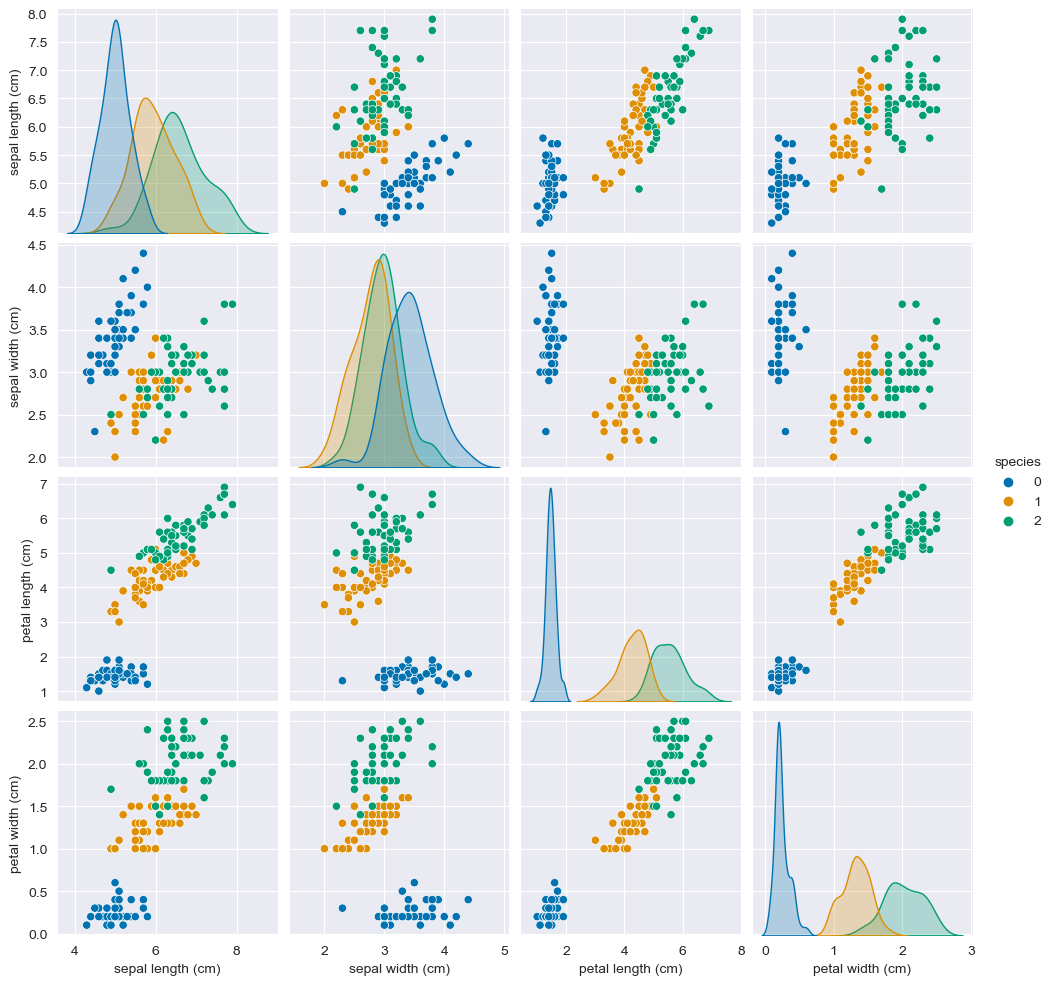

In [40]:
sns.pairplot(df, hue = 'species', palette='colorblind')

We want to focus on binary classification, and hence we discard all data points belonging to a certain class. This can be done by, for example, selecting all the rows that do not belong to that class. Here, we drop the class 'virginica'.

In [42]:
idcs = iris.target != 2  # get all the indices where the class is not 2
data = iris.data[idcs].astype(np.float32)
target = iris.target[idcs].astype(int)

Now, we buil the logistic regression model. We define the explanatory and the response variable below:

In [46]:
X = data[:, 3:]
y = target

We build a logistic regression model y ~ x and find its accuracy.

In [47]:
# here we use petal width
lm = linear_model.LogisticRegression().fit(X,y)

In [48]:
prediction = lm.predict(X)
accuracy =  metrics.accuracy_score(y, prediction)

print(('The prediction accuracy of the model is {}%').format(100*int(accuracy)))

The prediction accuracy of the model is 100%


Next, we use your trained model to predict the probability of the petal width being assigned to the right flower. We do this visually by plotting the probability distributions of seposa and versicolor according to the model.

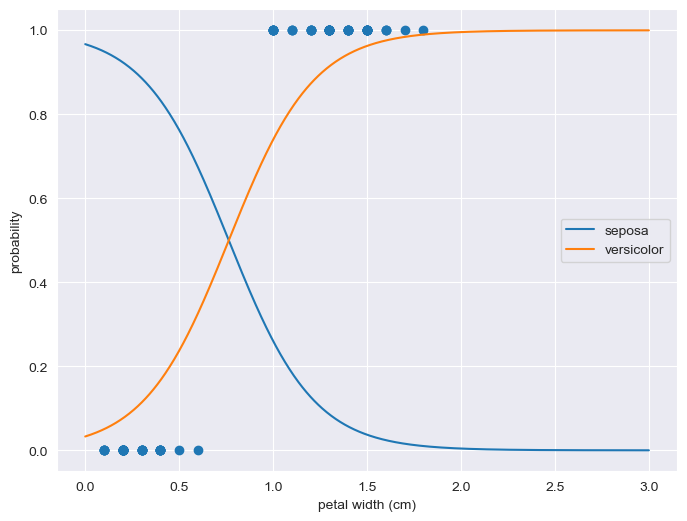

In [54]:
### Once you have correctly solved the exercise, run this cell.
xarr = np.linspace(0, 3, 1000).reshape(-1, 1)
yprob = lm.predict_proba(xarr)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X, y)
ax.plot(xarr, yprob[:, 0], label='seposa')
ax.plot(xarr, yprob[:, 1], label='versicolor')
ax.set_xlabel(iris.feature_names[3])
ax.set_ylabel('probability')
ax.legend()

## Linear Discriminant Analysis (LDA)
We're going to keep working with the iris dataset from the last exercise. We will use the built-in classifier in scikit-learn.

We start off with a scatter plot where the colors indicate the species.

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

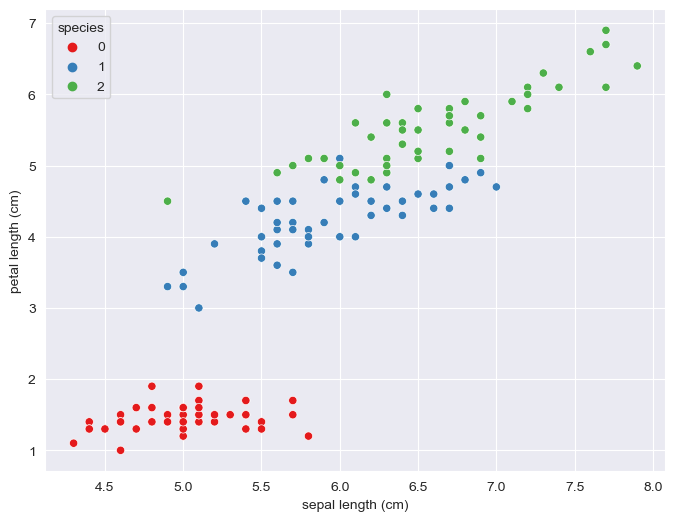

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(x = 'sepal length (cm)', y = 'petal length (cm)',
                hue='species', data=df, palette='Set1')

In [60]:
# Let us define set of variables
X = df[['sepal length (cm)', 'petal length (cm)']]
y = iris.target

Now we are ready to fit the LDA model, which uses Linear Discriminant Analysis.

In [61]:
# fit
lda = discriminant_analysis.LinearDiscriminantAnalysis().fit(X,y)

With the following code we can visualize the fit of our lda model by contouring its structure. We also give true positives the round shape, while assigning false positives to the traingle shape. Yet some versicolor and virginica are wrongly classified the model does a decent job with an accuracy fo 97%.

Mean accuracy: 0.97


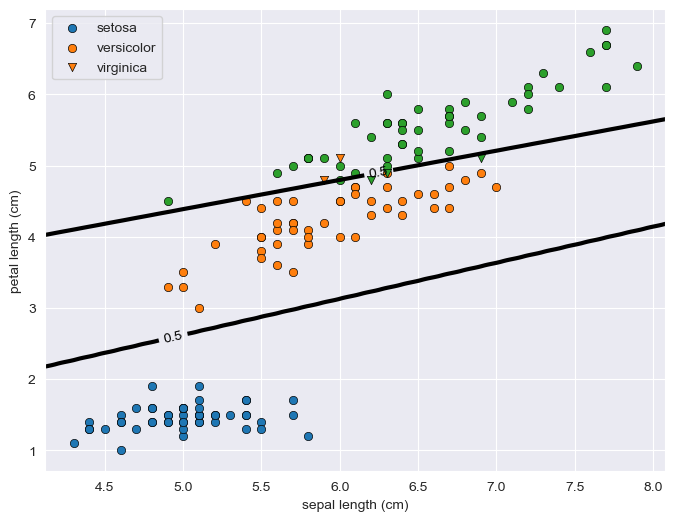

In [64]:
from matplotlib import cm
cmap = cm.get_cmap('tab10')

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
y_pred = lda.predict(X) # lda is model name, use name above for this to work
tp = (y == y_pred)  # true positive

X = np.asarray(X)

# true positives for each class
tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y == 2]
# split features into corresponding classes
X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
# split features into true/false positives
# note: ~tp0 means negation of tp0
X0_tp, X0_fp = X0[tp0], X0[~tp0]
X1_tp, X1_fp = X1[tp1], X1[~tp1]
X2_tp, X2_fp = X2[tp2], X2[~tp2]

# class 0 dots
sns.scatterplot(x=X0_tp[:, 0], y=X0_tp[:, 1], color=cmap(0), edgecolor='k')
sns.scatterplot(x=X0_fp[:, 0], y=X0_fp[:, 1], marker='v', color=cmap(0),
                edgecolor='k')

# class 1 dots
sns.scatterplot(x=X1_tp[:, 0], y=X1_tp[:, 1], color=cmap(1), edgecolor='k')
sns.scatterplot(x=X1_fp[:, 0], y=X1_fp[:, 1], marker='v', color=cmap(1),
                edgecolor='k')

# class 2 dot
sns.scatterplot(x=X2_tp[:, 0], y=X2_tp[:, 1], color=cmap(2), edgecolor='k')
sns.scatterplot(x=X2_fp[:, 0], y=X2_fp[:, 1], marker='v', color=cmap(2),
                edgecolor='k')

# decision boundaries
# draw them at the 50% probability level
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
# see https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
# ravel returns a contiguous flattened array
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
cs = ax.contour(xx, yy, Z, [0.5], linewidths=3, colors='black')
ax.clabel(cs, cs.levels, inline=True, fmt='%.1f', fontsize=10)

ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('petal length (cm)')
ax.legend(iris.target_names)
print('Mean accuracy: {:.2f}'.format(lda.score(X, y)))